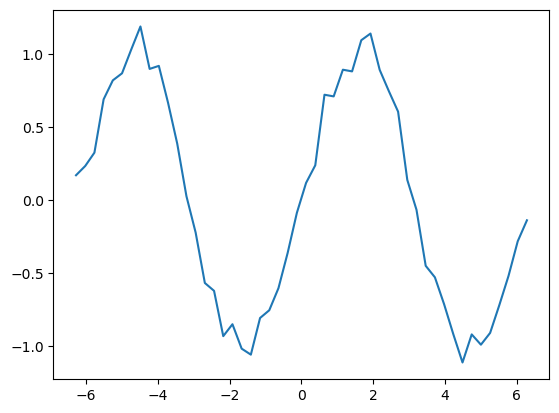

(40, 10, 1)
(40, 10, 1)


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi)
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data))

plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10
n_sample = len(x_data) - n_rnn
x = np.zeros((n_sample, n_rnn))
t = np.zeros((n_sample, n_rnn))
for i in range(0, n_sample):
    x[i] = sin_data[i:i+n_rnn]
    t[i] = sin_data[i+1:i+n_rnn+1]

x = x.reshape(n_sample, n_rnn, 1)
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1)
print(t.shape)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

batch_size = 8
n_in = 1
n_mid = 20
n_out = 1

model = Sequential()
model.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences = True))
model.add(Dense(n_out, activation="linear"))
model.compile(loss="mean_squared_error", optimizer="sgd")
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 10, 20)            440       
                                                                 
 dense (Dense)               (None, 10, 1)             21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
history = model.fit(x, t, epochs=20, batch_size=batch_size, validation_split=0.1)

Epoch 1/20
5/5 [==============================] - 1s 37ms/step - loss: 1.6936 - val_loss: 0.6907
Epoch 2/20
5/5 [==============================] - 0s 6ms/step - loss: 0.7059 - val_loss: 0.3719
Epoch 3/20
5/5 [==============================] - 0s 5ms/step - loss: 0.4105 - val_loss: 0.2670
Epoch 4/20
5/5 [==============================] - 0s 6ms/step - loss: 0.2882 - val_loss: 0.2053
Epoch 5/20
5/5 [==============================] - 0s 5ms/step - loss: 0.2265 - val_loss: 0.1666
Epoch 6/20
5/5 [==============================] - 0s 5ms/step - loss: 0.1959 - val_loss: 0.1510
Epoch 7/20
5/5 [==============================] - 0s 5ms/step - loss: 0.1764 - val_loss: 0.1379
Epoch 8/20
5/5 [==============================] - 0s 5ms/step - loss: 0.1618 - val_loss: 0.1314
Epoch 9/20
5/5 [==============================] - 0s 6ms/step - loss: 0.1516 - val_loss: 0.1130
Epoch 10/20
5/5 [==============================] - 0s 6ms/step - loss: 0.1421 - val_loss: 0.1139
Epoch 11/20
5/5 [=====================

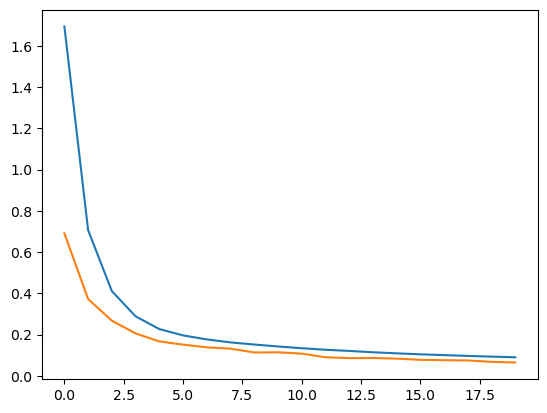

In [8]:
loss = history.history['loss']
vloss = history.history['val_loss']

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

1/1 [==============================] - 0s 14ms/step


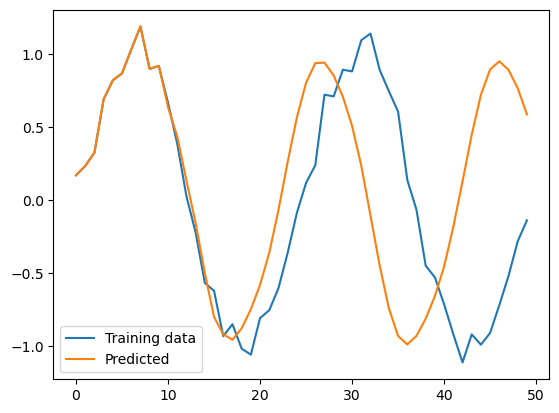

In [9]:
predicted = x[0].reshape(-1)

for i in range(0, n_sample):
    y = model.predict(predicted[-n_rnn:].reshape(1, n_rnn, 1))
    predicted = np.append(predicted, y[0][n_rnn-1][0])
plt.plot(np.arange(len(sin_data)), sin_data, label="Training data")
plt.plot(np.arange(len(predicted)), predicted, label="Predicted")
plt.legend()
plt.show()